In [1]:
%matplotlib inline

In [19]:
from matplotlib import animation
import numpy as np
from matplotlib import pyplot as plt
from thllib import flylib as flb

In [54]:
def plot_offset(flynum,start_angle = -30):
    idx = 6000
    angles = np.linspace(0,360,360*2)[:-1]
    positions = angles[np.argmax(fly.state_estimates,axis=1)]
    first_frame = np.squeeze(np.argwhere(np.array(fly.avepxl)>10)[0]) + 1
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    img = ax1.imshow(fly.images[idx+first_frame],cmap = plt.cm.gray)
    ax1.axis('off')
    ax2 = fig.add_subplot(1,2,1,projection = 'polar',frameon = False)
    ax2.patch.set_alpha(0.0)
    ln = ax2.plot([np.deg2rad(positions[idx]+start_angle),np.deg2rad(positions[idx]+start_angle)],[0,0.5],'-o')
    ax2.set_ybound(0,1)
    ax3 = fig.add_subplot(1,2,2)
    for idx in range(idx,idx + 2000,100):
    img = ax1.imshow(fly.images[idx+first_frame],cmap = plt.cm.gray)

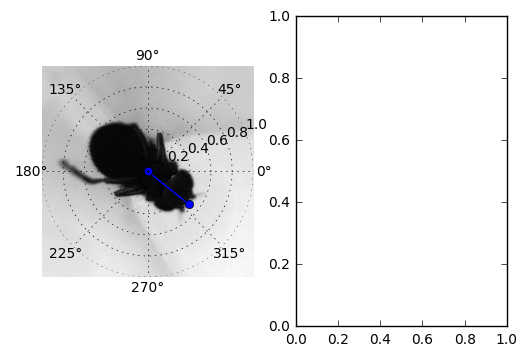

In [55]:
plot_offset(1331,start_angle = -30)

In [48]:
flynum = 1331
fly = flb.NetFly(flynum)
fly.open_signals(['hdf5','txt'])

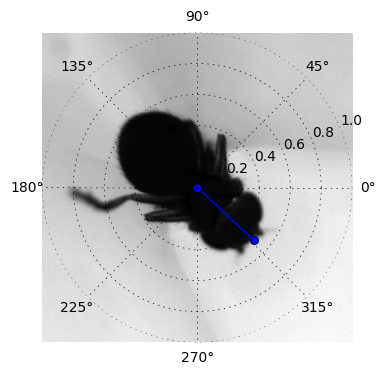

In [29]:
idx = 5000
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
img = ax1.imshow(fly.images[idx+first_frame],cmap = plt.cm.gray)
ax1.axis('off')
ax2 = fig.add_subplot(1,1,1,projection = 'polar',frameon = False)
ax2.patch.set_alpha(0.0)
ln = ax2.plot([np.deg2rad(positions[idx]+start_angle),np.deg2rad(positions[idx]+start_angle)],[0,0.5],'-o')
ax2.set_ybound(0,1)

mpath = fly.flypath + '/' + 'tracking_test.mp4'
def animate(idx):
    img.set_data(fly.images[idx+first_frame])
    ln[0].set_data([np.deg2rad(positions[idx]+start_angle),np.deg2rad(positions[idx]+start_angle)],[0,0.5])
    return img,ln[0],
    #if not((idx%200)>0):
    #        print idx
            
anim = animation.FuncAnimation(fig, animate,frames=5000, interval=20,blit = True)
anim.save(mpath, fps=30, extra_args=['-vcodec', 'libx264'])